In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import import_ipynb
from _dataLoader import *
# from tqdm import tqdm_notebook
# from tqdm.notebook import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt

if torch.cuda.is_available:
    device = torch.device('cuda:0')
    running_on = 'GPU'
else:
    device = torch.device('cpu')
    running_on = 'CPU'
print(f'PyTorch running on : {running_on}')

PyTorch running on : GPU


In [20]:
BATCH_SIZE = 64

In [21]:
train_set, test_set = create_dataset(BATCH_SIZE)

In [61]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)        
        self.fc3 = nn.Linear(128, 128)                
        self.fc4 = nn.Linear(128, 10)
        
    def forward(self, x):
        x      = F.relu(self.fc1(x))
        x      = F.relu(self.fc2(x))      
        sm     = F.relu(self.fc3(x))        
        output = F.softmax(self.fc4(sm), dim=1)
        return output, sm
    
    
def built(model, data, train=False, EPOCHS=5):
    
    loss_func = nn.CrossEntropyLoss()
    if train:
        loss = 'inf'
        for iter in (range(EPOCHS)):
            for batch in tqdm(data, desc=f'Epoch -> {total_epochs-EPOCHS + iter+1}/{total_epochs} | Loss -> {loss}'):
                sample, label = batch
                model.zero_grad()

                output, sm = model(sample.view(-1, 28*28).to(device))

                loss = loss_func(output, label.to(device))
                
                loss.backward()

                optim.step()

            loss_log.append(loss)
        return loss_log
        
        
    else:
        total   = 0
        correct = 0
        
        with torch.no_grad():
            for batch in tqdm(data):
                sample, label = batch

                output, sm = model(sample.view(-1, 28*28).to(device))
#                 return output, label
                for idx, i in enumerate(output):
                    total += 1
                    if torch.argmax(i) == label[idx]:
                        correct += 1

            accuracy = (correct/total)*100
            return accuracy
                

    

Epoch -> 4/5 | Loss -> inf: 100%|█████████████████████████████████████████████| 938/938 [00:12<00:00, 73.45it/s]
Epoch -> 5/5 | Loss -> 1.5873430967330933: 100%|██████████████████████████████| 938/938 [00:12<00:00, 74.37it/s]
100%|█████████████████████████████████████████████████████████████████████████| 938/938 [00:20<00:00, 45.44it/s]


Total Epochs : 5
Accuracy     : 80.55


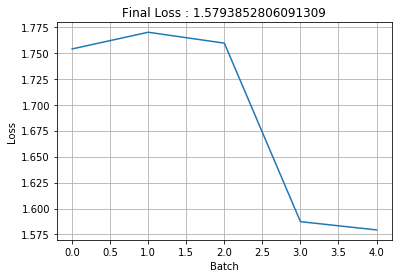

In [66]:
EPOCHS        = 2
LEARNING_RATE = 1e-3
CONTINUE_TRAINING = True

if not CONTINUE_TRAINING:
    model = Model().to(device)
    optim = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    total_epochs = 0
    loss_log = []


total_epochs += EPOCHS
loss_log = built(model, train=True, data=train_set, EPOCHS=EPOCHS)

accuracy = built(model, train=False, data=test_set)

plt.plot(loss_log)
plt.grid(1)
plt.title(f'Final Loss : {loss_log[-1]}')
plt.ylabel('Loss')
plt.xlabel('Batch')
print(f'Total Epochs : {total_epochs}')
print(f'Accuracy     : {round(accuracy, 2)}')